### Model-6

##### Using Tensorflow Hub's Universal Sentence Encoder

In [ ]:
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

!unzip "/content/nlp_getting_started.zip"

import pandas as pd

train_df = pd.read_csv("/content/train.csv")

test_df = pd.read_csv("/content/test.csv")

train_df_shuffled = train_df.sample(frac = 1,random_state= 42)

from sklearn.model_selection import train_test_split

train_sentences,val_sentences,train_labels,val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                         train_df_shuffled["target"].to_numpy(),
                                                                         test_size  = 0.1,
                                                                         random_state = 42)

--2021-06-10 08:23:38--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.142.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.004s  

2021-06-10 08:23:38 (132 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]

Archive:  /content/nlp_getting_started.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import tensorflow_hub as hub

In [ ]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
sample_sentence = "Hello , I guess it will rain today."

embed_samples = embed([sample_sentence,"Did you complete your assignment ?"])

print(embed_samples[0][:50])

tf.Tensor(
[-0.04355277 -0.03806685  0.01890817 -0.01500919  0.07748535  0.02880254
 -0.01949638 -0.00852246  0.07121855  0.04678915 -0.04455305 -0.06417858
 -0.02759545  0.04099195  0.03138254 -0.05709435  0.02123596  0.05496258
  0.0544672  -0.06690007  0.02235636  0.00130662  0.03650852  0.07523669
 -0.05428732  0.00433346  0.05830961 -0.03778309  0.00928899  0.05241452
  0.07931424  0.02441967 -0.02999685  0.01297987 -0.00938093 -0.07605829
  0.04677956 -0.07214481 -0.02836746 -0.03046669  0.07751355  0.01139229
  0.02936898  0.02962335 -0.10910599 -0.00252716 -0.02163188  0.04638669
  0.01874393 -0.02038939], shape=(50,), dtype=float32)


In [ ]:
embed_samples[0].shape

TensorShape([512])

In [ ]:
import tensorflow as tf

In [ ]:
##### Creating a Keras layer from Tenforflow Hub

sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable = False,
                                        input_shape = [],
                                        dtype = tf.string,
                                        name = "USE")

In [ ]:
# Creating a Sequential Model

model6 = tf.keras.Sequential([
                sentence_encoder_layer,
                tf.keras.layers.Dense(64,activation="relu"),
                tf.keras.layers.Dense(1,activation="sigmoid",name = "output_layer")],
                name = "USE_model6")              

In [ ]:
# Compiling the model

model6.compile(loss = "binary_crossentropy",
               optimizer = "Adam",
               metrics  = ["accuracy"])

In [ ]:
model6.summary()

Model: "USE_model6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
output_layer (Dense)         (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Fitting

model6_history = model6.fit(train_sentences,
                            train_labels,\
                            epochs = 5,
                            validation_data = (val_sentences,val_labels))

Epoch 1/5
215/215 [==============================] - 5s 12ms/step - loss: 0.5067 - accuracy: 0.7865 - val_loss: 0.4526 - val_accuracy: 0.7992
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.4140 - accuracy: 0.8164 - val_loss: 0.4464 - val_accuracy: 0.7979
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.4009 - accuracy: 0.8228 - val_loss: 0.4351 - val_accuracy: 0.8071
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3949 - accuracy: 0.8259 - val_loss: 0.4309 - val_accuracy: 0.8058
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3871 - accuracy: 0.8289 - val_loss: 0.4267 - val_accuracy: 0.8150


In [ ]:
# Predictions

model6_preds = model6.predict(val_sentences)

print(model6_preds)

print()

print(model6_preds.shape)

[[0.15904242]
 [0.8008196 ]
 [0.9895403 ]
 [0.22716598]
 [0.726175  ]
 [0.7335422 ]
 [0.98712975]
 [0.98124033]
 [0.9438666 ]
 [0.1016794 ]
 [0.6867903 ]
 [0.50134635]
 [0.1949794 ]
 [0.5521915 ]
 [0.25828785]
 [0.02845724]
 [0.37100443]
 [0.5996894 ]
 [0.34934804]
 [0.30042273]
 [0.9076191 ]
 [0.14246443]
 [0.50614595]
 [0.04180547]
 [0.92477995]
 [0.96460587]
 [0.06651192]
 [0.1199039 ]
 [0.10372297]
 [0.33339083]
 [0.50735176]
 [0.9424423 ]
 [0.43555567]
 [0.32119966]
 [0.5657732 ]
 [0.10183256]
 [0.9810953 ]
 [0.06199867]
 [0.04445477]
 [0.9849855 ]
 [0.07903677]
 [0.29786283]
 [0.44478536]
 [0.6106277 ]
 [0.26832786]
 [0.96311283]
 [0.45773825]
 [0.9650715 ]
 [0.67246413]
 [0.8765666 ]
 [0.06905132]
 [0.67028326]
 [0.20010905]
 [0.06494603]
 [0.12485215]
 [0.03976444]
 [0.12906826]
 [0.91434383]
 [0.13613863]
 [0.06656779]
 [0.09873917]
 [0.98163766]
 [0.9784063 ]
 [0.08306471]
 [0.94511807]
 [0.9671234 ]
 [0.70147264]
 [0.18033196]
 [0.07074695]
 [0.5793221 ]
 [0.10011953]
 [0.07

In [ ]:
model6_preds = tf.round(tf.squeeze(model6_preds))

model6_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [ ]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support

In [ ]:
def calculate_results(y_true,y_pred):

  model_accuracy = accuracy_score(y_true,y_pred)*100

  model_precision,model_recall,model_f1,_ = precision_recall_fscore_support(y_true,y_pred,average = "weighted")

  model_results = {"accuracy":model_accuracy,
                   "precision":model_precision,
                   "recall":model_recall,
                   "f1_score":model_f1}

  return model_results


In [ ]:
model6_results = calculate_results(val_labels,model6_preds)

model6_results

{'accuracy': 81.49606299212599,
 'f1_score': 0.8142251446314539,
 'precision': 0.8152722931679139,
 'recall': 0.8149606299212598}

### Model-7

##### Training on 10% of the data

In [ ]:
train_10_percent_split = int(0.1*len(train_sentences))

train_sentences_10_percent = train_sentences[:train_10_percent_split]

train_labels_10_percent = train_labels[:train_10_percent_split]

##### The model is same as model 6 so we can either write again or clone the model.

In [ ]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape = [],
                                        dtype = tf.string,
                                        trainable = False,
                                        name = "USE"
                                        )

In [ ]:
model7 = tf.keras.Sequential([
                              sentence_encoder_layer,
                              tf.keras.layers.Dense(64,activation="relu"),
                              tf.keras.layers.Dense(1,activation="sigmoid",name = "output_layer")                             
],name = "Model7_USE_10_percent")


model7.compile(loss = "binary_crossentropy",
               optimizer = "Adam",
               metrics = ["accuracy"])

In [ ]:
model7.summary()

Model: "Model7_USE_10_percent"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32832     
_________________________________________________________________
output_layer (Dense)         (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
model7_history = model7.fit(train_sentences_10_percent,
                            train_labels_10_percent,
                            epochs = 5,
                            validation_data = (val_sentences,val_labels))

Epoch 1/5
22/22 [==============================] - 3s 36ms/step - loss: 0.6715 - accuracy: 0.6526 - val_loss: 0.6513 - val_accuracy: 0.6890
Epoch 2/5
22/22 [==============================] - 0s 19ms/step - loss: 0.6038 - accuracy: 0.8029 - val_loss: 0.5960 - val_accuracy: 0.7664
Epoch 3/5
22/22 [==============================] - 0s 19ms/step - loss: 0.5296 - accuracy: 0.8175 - val_loss: 0.5412 - val_accuracy: 0.7756
Epoch 4/5
22/22 [==============================] - 0s 19ms/step - loss: 0.4644 - accuracy: 0.8336 - val_loss: 0.5045 - val_accuracy: 0.7769
Epoch 5/5
22/22 [==============================] - 0s 19ms/step - loss: 0.4215 - accuracy: 0.8248 - val_loss: 0.4882 - val_accuracy: 0.7795


In [ ]:
model7_preds = model7.predict(val_sentences)

model7_preds.shape

(762, 1)

In [ ]:
model7_preds = tf.round(tf.squeeze(model7_preds))

model7_preds.shape

TensorShape([762])

In [ ]:
# Evaluating

model7_results = calculate_results(val_labels,model7_preds)

model7_results

{'accuracy': 77.95275590551181,
 'f1_score': 0.7784163768415738,
 'precision': 0.7797634583030512,
 'recall': 0.7795275590551181}

In [ ]:
# results (dictionaries) from NLP2 notebook

baseline_results = {'accuracy': 79.26509186351706,
                    'f1_score': 0.7862189758049549,
                    'precision': 0.8111390004213173,
                    'recall': 0.7926509186351706}

model1_results = {'accuracy': 78.21522309711287,
                  'f1_score': 0.7786244698114966,
                  'precision': 0.7881971444440814,
                  'recall': 0.7821522309711286}

model2_results = {'accuracy': 78.21522309711287,
                  'f1_score': 0.7801766074787211,
                  'precision': 0.7840694582051416,
                  'recall': 0.7821522309711286}

model3_results = {'accuracy': 76.24671916010499,
                  'f1_score': 0.75760506518967,
                  'precision': 0.7701495378408689,
                  'recall': 0.7624671916010499}

model4_results = {'accuracy': 77.16535433070865,
                  'f1_score': 0.7688960790251899,
                  'precision': 0.7747861668850706,
                  'recall': 0.7716535433070866}

model5_results = {'accuracy': 76.50918635170603,
                  'f1_score': 0.7626195388168748,
                  'precision': 0.7672217903358366,
                  'recall': 0.7650918635170604}


### Comparing the performance of each of our models

In [ ]:
import pandas as pd

In [ ]:
all_models_results = pd.DataFrame({"0_Baseline_MultinomialNB":baseline_results,
                                  "1_Simple_Dense":model1_results,
                                  "2_LSTM":model2_results,
                                  "3_GRU":model3_results,
                                  "4_Bidirectional_LSTM":model4_results,
                                  "5_Conv1D":model5_results,
                                  "6_USE_100_percent_data":model6_results,
                                  "7_USE_10_percent_data":model7_results})

all_models_results

,0_Baseline_MultinomialNB,1_Simple_Dense,2_LSTM,3_GRU,4_Bidirectional_LSTM,5_Conv1D,USE_100_percent_data,USE_10_percent_data
accuracy,79.265092,78.215223,78.215223,76.246719,77.165354,76.509186,81.496063,77.952756
f1_score,0.786219,0.778624,0.780177,0.757605,0.768896,0.762620,0.814225,0.778416
precision,0.811139,0.788197,0.784069,0.770150,0.774786,0.767222,0.815272,0.779763
recall,0.792651,0.782152,0.782152,0.762467,0.771654,0.765092,0.814961,0.779528


In [ ]:
all_models_results = all_models_results.transpose()

all_models_results

,accuracy,f1_score,precision,recall
0_Baseline_MultinomialNB,79.265092,0.786219,0.811139,0.792651
1_Simple_Dense,78.215223,0.778624,0.788197,0.782152
2_LSTM,78.215223,0.780177,0.784069,0.782152
3_GRU,76.246719,0.757605,0.770150,0.762467
4_Bidirectional_LSTM,77.165354,0.768896,0.774786,0.771654
5_Conv1D,76.509186,0.762620,0.767222,0.765092
USE_100_percent_data,81.496063,0.814225,0.815272,0.814961
USE_10_percent_data,77.952756,0.778416,0.779763,0.779528


In [ ]:
# Getting accuracy in the same scale as others

all_models_results["accuracy"] = all_models_results["accuracy"]/100

all_models_results["accuracy"]

0_Baseline_MultinomialNB    0.792651
1_Simple_Dense              0.782152
2_LSTM                      0.782152
3_GRU                       0.762467
4_Bidirectional_LSTM        0.771654
5_Conv1D                    0.765092
USE_100_percent_data        0.814961
USE_10_percent_data         0.779528
Name: accuracy, dtype: float64

##### Plotting to compare models

In [ ]:
import matplotlib.pyplot as plt

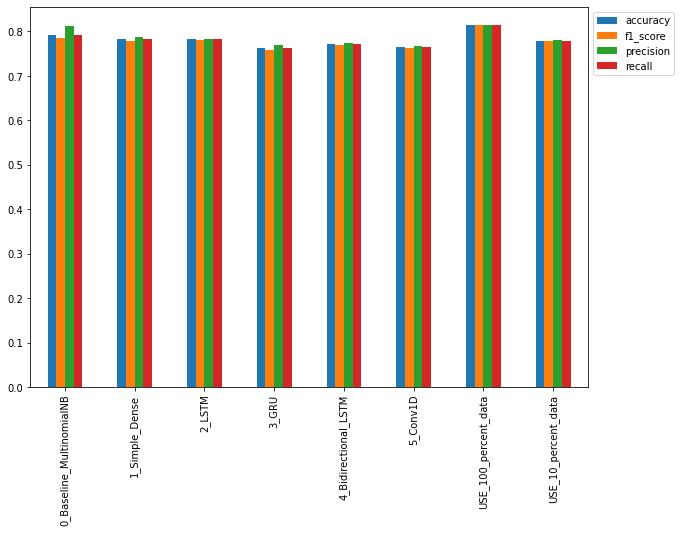

In [ ]:
all_models_results.plot(kind = "bar",
                        figsize = (10,7)).legend(bbox_to_anchor=(1.0, 1.0));

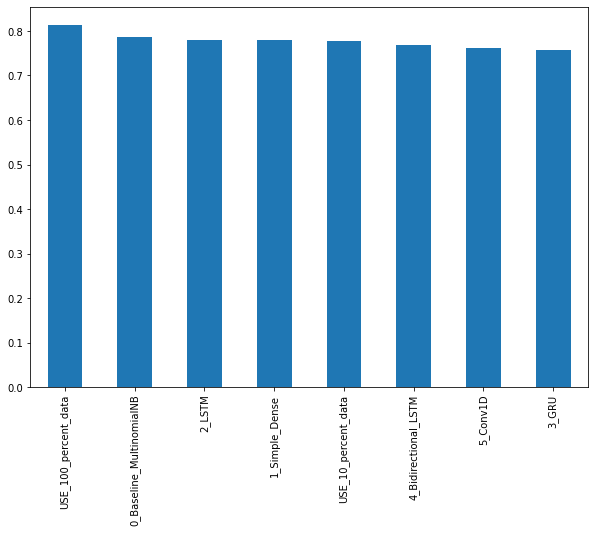

In [ ]:
# Sorting models by f1_score

all_models_results.sort_values("f1_score",ascending=False)["f1_score"].plot(kind = "bar",figsize = (10,7));

In [ ]:
# We can see that model6 performs the best 

# Saving the model

model6.save("Disaster_or_not_USE_model")

INFO:tensorflow:Assets written to: Disaster_or_not_USE_model/assets


INFO:tensorflow:Assets written to: Disaster_or_not_USE_model/assets


In [ ]:
model6_loaded = tf.keras.models.load_model("Disaster_or_not_USE_model")

model6_loaded.summary()

Model: "USE_model6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
output_layer (Dense)         (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
model6_loaded.evaluate(val_sentences,val_labels)

24/24 [==============================] - 1s 9ms/step - loss: 0.4267 - accuracy: 0.8150


[0.4266822934150696, 0.8149606585502625]

### Making predictions on custom tweets

##### 0 = not diaster
##### 1 = diaster

In [ ]:
def pred(custom_tweet):
  if tf.round(tf.squeeze(model6.predict([custom_tweet]))) == 0:
    print("Not Disaster")
  else:
    print("Disaster")

In [ ]:
custom_tweet1 = "#MumbaiRains meant it was raining memes on social media too! Cloud with rain"

pred(custom_tweet1)

Not Disaster


In [ ]:
custom_tweet2 = "Between 1998-2017, earthquakes caused nearly 750 000 deaths globally, more than half of all deaths related to natural disasters. "

pred(custom_tweet2)

Disaster
